In [1]:
import pandas as pd
import datetime
pd.set_option('display.max_colwidth', -1)
import numpy as np
import time

In [5]:
cars = pd.read_csv('cars_clean_{}.csv'.format(time.strftime("%Y%m%d")))

In [6]:
cars.head()

,year,price,mileage,color,URL
0,2019,14995,8500.0,blue,https://boston.craigslist.org/gbs/ctd/d/new-town-2019-honda-civic-lx-8500-miles/7037894678.html
1,2016,13995,35000.0,blue,https://boston.craigslist.org/gbs/ctd/d/new-town-2016-honda-civic-ex-miles/7042493320.html
2,2016,12500,38417.0,grey,https://boston.craigslist.org/gbs/ctd/d/west-newton-2016-honda-civic-lx-sedan/7038754066.html
3,2017,13200,35457.0,grey,https://boston.craigslist.org/gbs/ctd/d/west-newton-2017-honda-civic-lx-sedan/7038754991.html
4,2016,13000,41126.0,nm,https://boston.craigslist.org/gbs/cto/d/canton-2016-honda-civic-lx-sedan-41k/7042912632.html


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f56e6d8>],
      dtype=object)

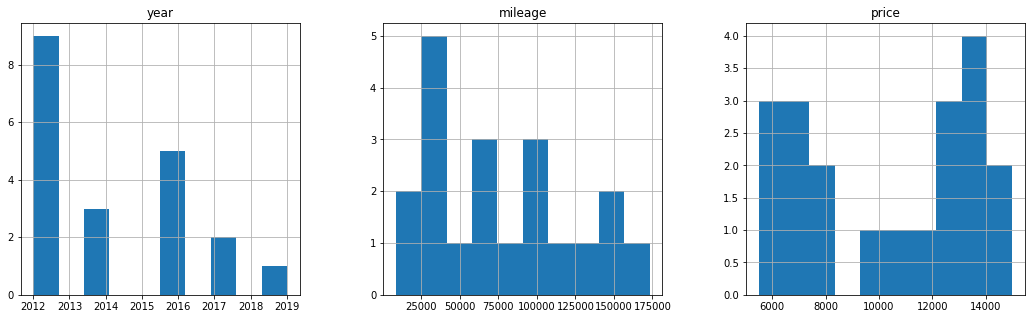

In [27]:
figure, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
cars.hist('year', ax=ax[0])
cars.hist('price', ax=ax[2])
cars.hist('mileage', ax=ax[1])

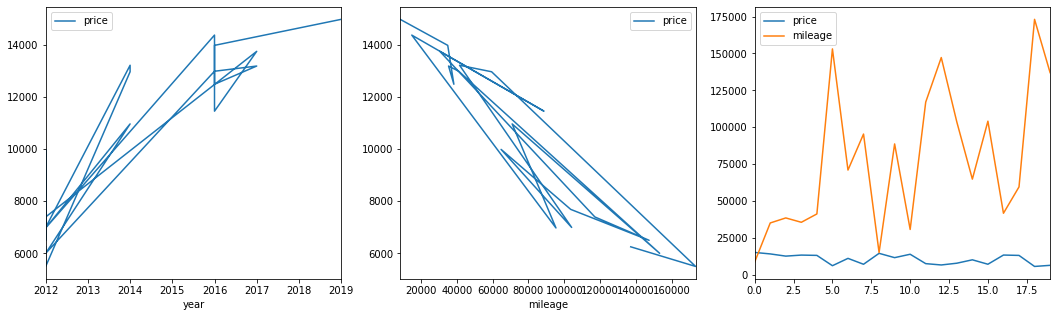

In [40]:
figure, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
cars.plot(x='year', y='price',ax=ax[0])
cars.plot(x='mileage', y='price', ax=ax[1])
cars[['price','mileage']].plot(ax=ax[2])

In [42]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
year,20.0,2014.15,2.277464,2012.0,2012.0,2014.0,2016.00,2019.0
price,20.0,10389.60,3341.297312,5495.0,6990.0,11220.0,13207.50,14995.0
mileage,20.0,77991.55,49082.904189,8500.0,37677.0,67823.0,107302.25,173159.0


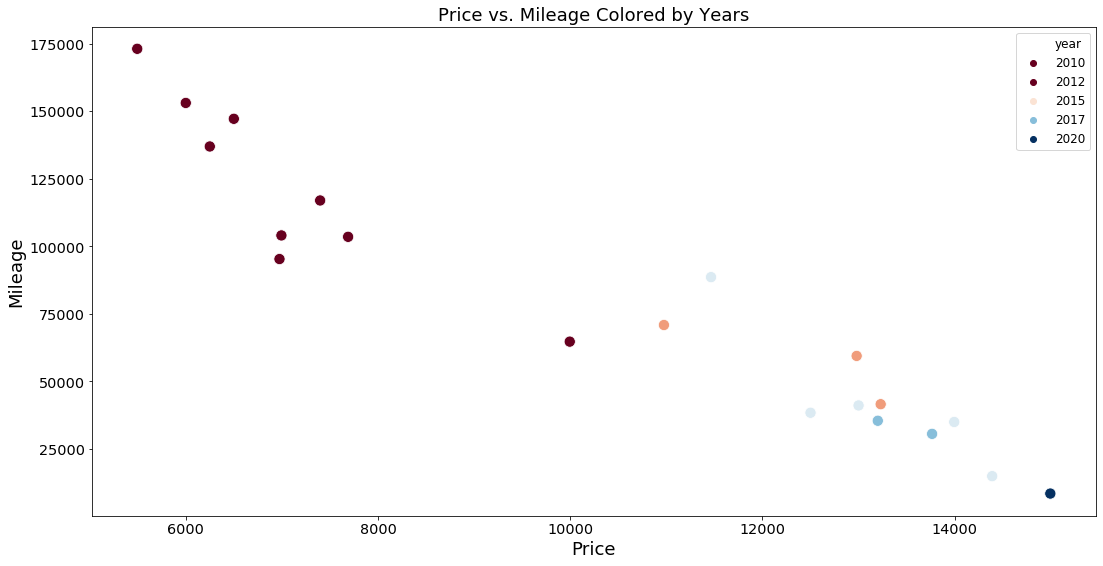

In [51]:
import seaborn as sns
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (23, 9),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

plt.figure(figsize=(18, 9))
sns.scatterplot(x='price', y='mileage', hue='year', palette='RdBu', x_jitter=True, y_jitter=True, s=125, data=cars.dropna())
plt.legend(fontsize=12)
plt.xlabel("Price", fontsize=18)
plt.ylabel("Mileage", fontsize=18);
plt.title("Price vs. Mileage Colored by Years", fontsize=18);

a scatter plot, where the points are colored by years. This shows a clear and understandable stratification: we see layers of points clustered around particular prices and mileages, and as mileage increases, prices decreasses.

We can call a regplot() on these two variables to get a regression line with a bootstrap confidence interval calculated about the line and shown as a shaded region with the code below. If you haven’t heard of bootstrap confidence intervals, they are a really cool statistical technique that are worth a read 'https://www.inferentialthinking.com/chapters/13/2/Bootstrap.html".

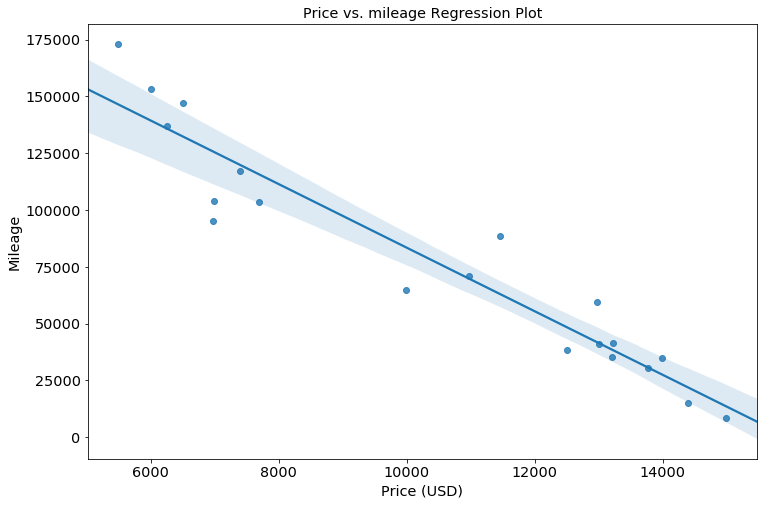

In [52]:
plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='mileage', data=cars.dropna());
plt.title('Price vs. mileage Regression Plot');
plt.xlabel("Price (USD)");
plt.ylabel("Mileage");

In [53]:
cars.corr()

,year,price,mileage
year,1.000000,0.890881,-0.822770
price,0.890881,1.000000,-0.952506
mileage,-0.822770,-0.952506,1.000000


In [55]:
cars.groupby('color').mean()

,year,price,mileage
color,,,
blue,2015.75,13800.0,36137.00
grey,2016.50,12732.5,48275.25
nm,2013.00,8876.9,93201.50
silver,2012.00,6446.5,145083.50


In [56]:
cars.groupby('year').mean()

,price,mileage
year,,
2012,7033.0,121689.777778
2014,12395.0,57316.000000
2016,13070.0,43624.000000
2017,13482.5,33027.500000
2019,14995.0,8500.000000


In [58]:
cars.groupby('year').mean()['price'].sort_values(ascending=False)

year
2019    14995.0
2017    13482.5
2016    13070.0
2014    12395.0
2012    7033.0 
Name: price, dtype: float64

Lastly, I looked at the spread of each year in terms of price. By doing this, I saw how prices in years can vary, and to what degree.

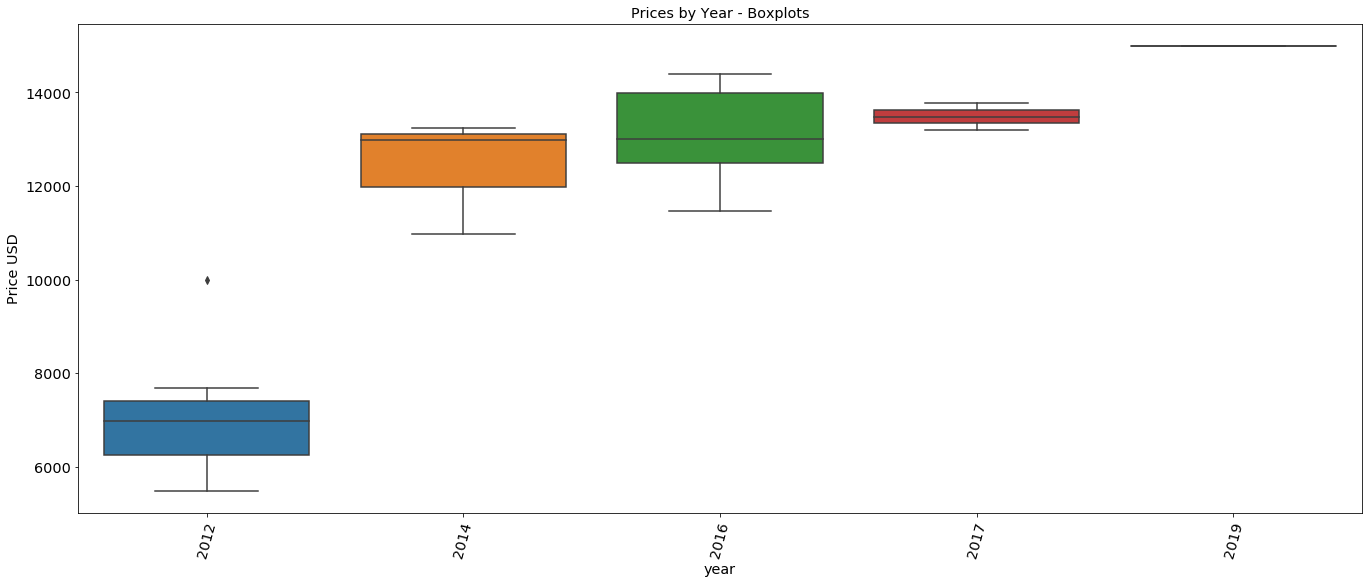

In [59]:
sns.boxplot(x='year', y='price', data=cars)
plt.xlabel("year");
plt.xticks(rotation=75)
plt.ylabel("Price USD");
plt.title("Prices by Year - Boxplots");

In [61]:
cars.head()

,year,price,mileage,color,URL
0,2019,14995,8500.0,blue,https://boston.craigslist.org/gbs/ctd/d/new-town-2019-honda-civic-lx-8500-miles/7037894678.html
1,2016,13995,35000.0,blue,https://boston.craigslist.org/gbs/ctd/d/new-town-2016-honda-civic-ex-miles/7042493320.html
2,2016,12500,38417.0,grey,https://boston.craigslist.org/gbs/ctd/d/west-newton-2016-honda-civic-lx-sedan/7038754066.html
3,2017,13200,35457.0,grey,https://boston.craigslist.org/gbs/ctd/d/west-newton-2017-honda-civic-lx-sedan/7038754991.html
4,2016,13000,41126.0,nm,https://boston.craigslist.org/gbs/cto/d/canton-2016-honda-civic-lx-sedan-41k/7042912632.html


In [66]:
cars[(cars['year']>=2016) & (cars['price']<13000)].sort_values('year')

,year,price,mileage,color,URL
2,2016,12500,38417.0,grey,https://boston.craigslist.org/gbs/ctd/d/west-newton-2016-honda-civic-lx-sedan/7038754066.html
9,2016,11465,88629.0,grey,https://boston.craigslist.org/nos/ctd/d/salem-2016-honda-civic-ex-sedan-cvt/7037361384.html
